In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from scipy.stats import ttest_ind, ttest_1samp
from itertools import combinations

%matplotlib inline


sns.set_style('whitegrid')

In [2]:
train_df = pd.read_csv('../Data_Sets/Ischemic_Stroke/stroke_train.csv').set_index('Unnamed: 0')
test_df = pd.read_csv('../Data_Sets/Ischemic_Stroke/stroke_test.csv').set_index('Unnamed: 0')

display(train_df.head())
test_df.head()

,Stroke,NASCET,CALCVol,CALCVolProp,MATXVol,MATXVolProp,LRNCVol,LRNCVolProp,MaxCALCArea,MaxCALCAreaProp,...,WallVol,MaxStenosisByDiameter,age,sex,SmokingHistory,AtrialFibrillation,CoronaryArteryDisease,DiabetesHistory,HypercholesterolemiaHistory,HypertensionHistory
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,N,0,235.252599,0.070443,3156.834690,0.759958,224.871710,0.091085,12.350494,0.365768,...,4192.170353,10.544113,72,1,1,0,0,0,0,1
2,N,0,31.433595,0.016165,3032.860796,0.813306,368.560663,0.133989,7.130660,0.211247,...,3917.039836,18.646197,76,1,1,0,0,1,1,1
4,N,0,113.404823,0.038081,3835.220140,0.782526,321.158928,0.083037,16.286916,0.408811,...,4935.327463,19.735114,72,0,0,0,0,0,0,0
5,Y,0,780.823789,0.213432,3518.876937,0.761089,140.517346,0.032065,63.350869,0.576206,...,4909.503817,20.288317,61,1,1,0,0,1,1,1
7,N,0,84.055774,0.041384,2990.273268,0.749869,293.269922,0.075398,17.583561,0.321507,...,4045.053268,49.297050,65,1,0,0,0,0,0,1


,Stroke,NASCET,CALCVol,CALCVolProp,MATXVol,MATXVolProp,LRNCVol,LRNCVolProp,MaxCALCArea,MaxCALCAreaProp,...,WallVol,MaxStenosisByDiameter,age,sex,SmokingHistory,AtrialFibrillation,CoronaryArteryDisease,DiabetesHistory,HypercholesterolemiaHistory,HypertensionHistory
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
3,N,0,517.558930,0.130224,4148.996874,0.768797,385.967065,0.081029,32.557576,0.384549,...,5714.514179,34.887367,86,0,1,1,1,1,1,1
11,Y,0,427.688617,0.097090,3892.058564,0.667875,922.339627,0.162703,40.357672,0.564494,...,6007.333626,48.552005,90,0,0,0,0,0,1,1
12,Y,0,107.740716,0.045316,3884.866104,0.784679,347.129811,0.083944,13.977406,0.287493,...,4952.294772,35.040281,56,1,1,0,0,0,0,0
13,N,0,33.888865,0.017439,2406.160126,0.853492,132.571223,0.061020,10.301051,0.211103,...,2907.390051,29.158361,62,0,1,0,0,0,1,1
17,N,0,59.847451,0.044490,2173.976632,0.855268,31.867959,0.018097,9.818892,0.410504,...,2616.992609,31.181459,79,0,1,0,0,0,1,1


In [3]:
total_df = pd.concat([train_df, test_df], axis=0)

total_df

,Stroke,NASCET,CALCVol,CALCVolProp,MATXVol,MATXVolProp,LRNCVol,LRNCVolProp,MaxCALCArea,MaxCALCAreaProp,...,WallVol,MaxStenosisByDiameter,age,sex,SmokingHistory,AtrialFibrillation,CoronaryArteryDisease,DiabetesHistory,HypercholesterolemiaHistory,HypertensionHistory
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,N,0,235.252599,0.070443,3156.834690,0.759958,224.871710,0.091085,12.350494,0.365768,...,4192.170353,10.544113,72,1,1,0,0,0,0,1
2,N,0,31.433595,0.016165,3032.860796,0.813306,368.560663,0.133989,7.130660,0.211247,...,3917.039836,18.646197,76,1,1,0,0,1,1,1
4,N,0,113.404823,0.038081,3835.220140,0.782526,321.158928,0.083037,16.286916,0.408811,...,4935.327463,19.735114,72,0,0,0,0,0,0,0
5,Y,0,780.823789,0.213432,3518.876937,0.761089,140.517346,0.032065,63.350869,0.576206,...,4909.503817,20.288317,61,1,1,0,0,1,1,1
7,N,0,84.055774,0.041384,2990.273268,0.749869,293.269922,0.075398,17.583561,0.321507,...,4045.053268,49.297050,65,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,Y,1,204.896563,0.085648,3564.049565,0.846239,206.063915,0.078666,20.786641,0.289324,...,4543.937572,73.821643,87,1,0,0,0,0,0,1
99,N,1,79.470906,0.033084,4007.650200,0.803863,331.321838,0.078770,8.222499,0.232652,...,5094.595276,77.871777,67,1,0,0,0,1,0,1
101,N,1,74.435957,0.040061,2809.318209,0.831635,258.430109,0.098915,14.920169,0.235911,...,3488.873919,86.041633,76,1,0,0,1,0,1,1


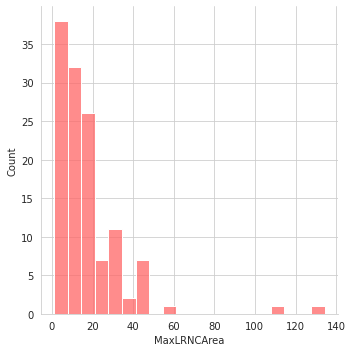

In [4]:
sns.displot(x='MaxLRNCArea', data=total_df, bins=20, color='#ff6666')

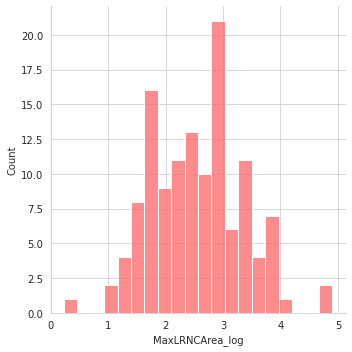

In [5]:
total_df['MaxLRNCArea_log'] = np.log(total_df.MaxLRNCArea) # Performing log transformation on the data results in symmetric distribution

sns.displot(x='MaxLRNCArea_log', data=total_df, bins=20, color='#ff6666')

<AxesSubplot:>

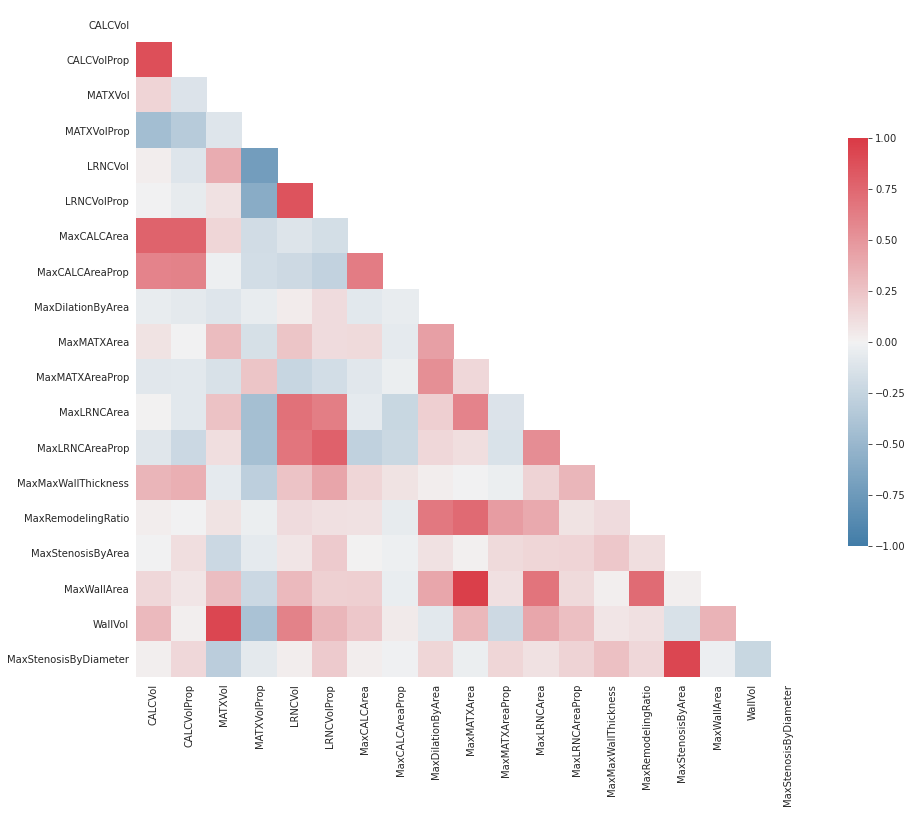

In [6]:
feature_corr = total_df.iloc[:, 2:-9].corr()
mask = np.triu(feature_corr)
cmap = sns.diverging_palette(240, 10, as_cmap=True)

f, ax = plt.subplots(1, 1, figsize=(15, 15))
sns.heatmap(feature_corr, vmin=-1, vmax=1, mask=mask, cmap=cmap, square=True, cbar_kws={'shrink': 0.5})

Three pairs of features show unacceptably high correlations (r > 0.9):

- Vessel wall volumn (WallVol) and matrix volume (MATXVol);
- Maximum cross-sectional wall area (MaxWallArea) and maximum matrix area (MaxMATXArea);
- Maximum cross-sectional stenosis based on area (MaxStenosisByArea) and maximum cross-sectional stenosis based on diameter (which makes sense - area and diameter);

<div class="alert alert-info">
     
**Note:**

The correlation threshold is arbitrary and need to be adjusted depending on the problem and the models to be used.
     
</div>

In [7]:
new_df = pd.concat([total_df.Stroke, total_df.iloc[:, 2:-9]], axis=1).sort_index()
new_df.Stroke = np.where(new_df.Stroke=='Y', 1, 0)

new_df

,Stroke,CALCVol,CALCVolProp,MATXVol,MATXVolProp,LRNCVol,LRNCVolProp,MaxCALCArea,MaxCALCAreaProp,MaxDilationByArea,MaxMATXArea,MaxMATXAreaProp,MaxLRNCArea,MaxLRNCAreaProp,MaxMaxWallThickness,MaxRemodelingRatio,MaxStenosisByArea,MaxWallArea,WallVol,MaxStenosisByDiameter
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
1,0,235.252599,0.070443,3156.834690,0.759958,224.871710,0.091085,12.350494,0.365768,520.982587,71.247433,0.952371,21.686815,0.429578,2.409943,5.697931,18.995542,106.206757,4192.170353,10.544113
2,0,31.433595,0.016165,3032.860796,0.813306,368.560663,0.133989,7.130660,0.211247,91.720046,27.210836,0.945554,6.434661,0.281510,2.540334,1.739927,30.237614,33.367143,3917.039836,18.646197
3,0,517.558930,0.130224,4148.996874,0.768797,385.967065,0.081029,32.557576,0.384549,524.466913,94.829365,0.944950,28.824581,0.393561,4.069342,6.135841,33.529209,137.135168,5714.514179,34.887367
4,0,113.404823,0.038081,3835.220140,0.782526,321.158928,0.083037,16.286916,0.408811,270.969302,38.122114,0.945910,5.705054,0.154779,3.708515,2.831636,33.939059,55.346714,4935.327463,19.735114
5,1,780.823789,0.213432,3518.876937,0.761089,140.517346,0.032065,63.350869,0.576206,2270.451201,341.120893,0.969199,6.046787,0.187097,6.115838,15.647750,34.309852,426.478580,4909.503817,20.288317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0,176.825752,0.160170,2525.800960,0.843681,149.888675,0.062800,30.019764,0.074439,29.640835,35.741408,0.959933,8.059074,0.173856,1.939997,1.209192,100.000000,63.796742,3220.090127,100.000000
124,0,4.017739,0.002714,1757.268326,0.746284,391.304992,0.191244,1.754366,0.075423,34.203240,26.790390,0.959579,9.398708,0.576967,14.829229,3.239245,100.000000,30.392507,2379.228434,100.000000
125,1,90.719703,0.053816,3041.624443,0.768139,314.674186,0.096674,17.141824,0.240941,678.914903,74.487347,0.951197,16.554682,0.222246,8.579903,8.442910,100.000000,78.644195,3963.830865,100.000000


In [8]:
features = new_df.columns[1:]

features

Index(['CALCVol', 'CALCVolProp', 'MATXVol', 'MATXVolProp', 'LRNCVol',
       'LRNCVolProp', 'MaxCALCArea', 'MaxCALCAreaProp', 'MaxDilationByArea',
       'MaxMATXArea', 'MaxMATXAreaProp', 'MaxLRNCArea', 'MaxLRNCAreaProp',
       'MaxMaxWallThickness', 'MaxRemodelingRatio', 'MaxStenosisByArea',
       'MaxWallArea', 'WallVol', 'MaxStenosisByDiameter'],
      dtype='object')

In [9]:
X = new_df.iloc[:, 1:].values
y = new_df.Stroke.values

In [18]:
RepeatedStratifiedKFold?

Init signature: RepeatedStratifiedKFold(*, n_splits=5, n_repeats=10, random_state=None)
Docstring:     
Repeated Stratified K-Fold cross validator.

Repeats Stratified K-Fold n times with different randomization in each
repetition.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
n_splits : int, default=5
    Number of folds. Must be at least 2.

n_repeats : int, default=10
    Number of times cross-validator needs to be repeated.

random_state : int or RandomState instance, default=None
    Controls the generation of the random states for each repetition.
    Pass an int for reproducible output across multiple function calls.
    See :term:`Glossary <random_state>`.

Examples
--------
>>> import numpy as np
>>> from sklearn.model_selection import RepeatedStratifiedKFold
>>> X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
>>> y = np.array([0, 0, 1, 1])
>>> rskf = RepeatedStratifiedKFold(n_splits=2, n_repeats=2,
...     random_state=36851234)
>>> for train_i

In [19]:
kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=50, random_state=516)

dummy_clf = DummyClassifier(strategy='constant', constant=0)
lr_clf = LogisticRegression()
dummy_auc = np.zeros((500, 19))
lr_auc = np.zeros((500, 19))

for i in range(len(features)):
    dummy_auc[:, i] = cross_val_score(dummy_clf, X[:, i].reshape(-1, 1), y, scoring='roc_auc', cv=kfold, n_jobs=-1)
    lr_auc[:, i] = cross_val_score(lr_clf, X[:, i].reshape(-1, 1), y, scoring='roc_auc', cv=kfold, n_jobs=-1)

In [25]:
results = ttest_ind(dummy_auc, lr_auc, axis=0)
p = results.pvalue

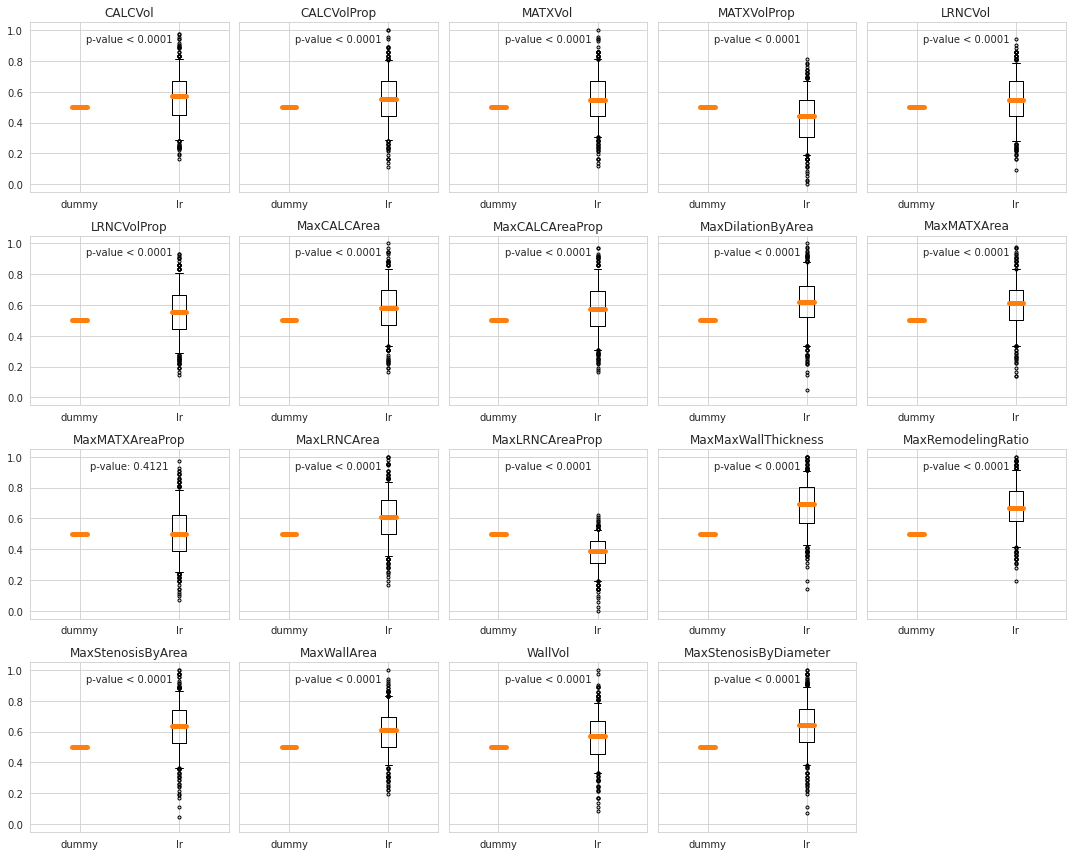

In [26]:
f, ax = plt.subplots(4, 5, figsize=(15, 12), sharey=True)
ax = ax.ravel()
feature_len = len(features)

for i in range(len(ax)):
    if i < feature_len:
        title = features[i]
        ax[i].boxplot([dummy_auc[:, i], lr_auc[:, i]],
                      whis=(5, 95),
                      flierprops=dict(markersize=3),
                      medianprops=dict(linewidth=5))
        ax[i].set_xticklabels(['dummy', 'lr'])
        ax[i].set_title(title)
        if p[i] < 0.0001:
            ax[i].text(x=0.5, y=0.9, s='p-value < 0.0001', verticalalignment='center', horizontalalignment='center', transform=ax[i].transAxes)
        else:
            ax[i].text(x=0.5, y=0.9, s=f'p-value: {p[i]:.4f}', verticalalignment='center', horizontalalignment='center', transform=ax[i].transAxes)
    else:
        f.delaxes(ax[i])

f.tight_layout()

In [27]:
features[p.argsort()] # MaxMaxWallThickness and MaxRemodelingRatio have the strongest association

Index(['MaxMaxWallThickness', 'MaxLRNCAreaProp', 'MaxRemodelingRatio',
       'MaxStenosisByDiameter', 'MaxStenosisByArea', 'MaxWallArea',
       'MaxLRNCArea', 'MaxDilationByArea', 'MaxMATXArea', 'MaxCALCArea',
       'MaxCALCAreaProp', 'MATXVolProp', 'WallVol', 'CALCVol', 'LRNCVolProp',
       'CALCVolProp', 'MATXVol', 'LRNCVol', 'MaxMATXAreaProp'],
      dtype='object')

<AxesSubplot:xlabel='MaxMaxWallThickness', ylabel='MaxLRNCAreaProp'>

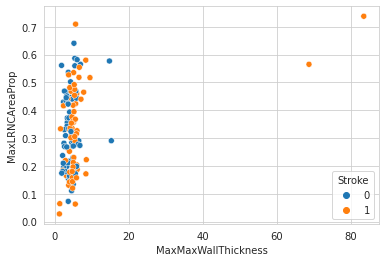

In [29]:
sns.scatterplot(x='MaxMaxWallThickness', y='MaxLRNCAreaProp', hue='Stroke', data=new_df)

<AxesSubplot:xlabel='improvements', ylabel='-log10Pvalue'>

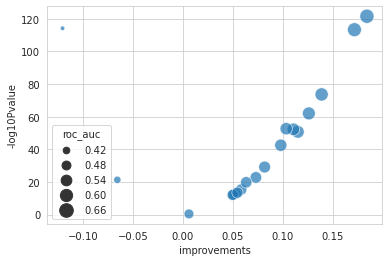

In [30]:
improvements = lr_auc.mean(0) - dummy_auc.mean(0)
metrics_df = pd.DataFrame({'improvements': improvements,
                           '-log10Pvalue': -np.log10(p),
                           'roc_auc': lr_auc.mean(0)})

sns.scatterplot(x='improvements', y='-log10Pvalue', size='roc_auc', sizes=(20, 200), alpha=0.7, data=metrics_df)

In [31]:
for p in combinations(features, 2):
    title = p[0] + '_' + p[1]
    new_df[title] = new_df[p[0]] * new_df[p[1]]

new_df

,Stroke,CALCVol,CALCVolProp,MATXVol,MATXVolProp,LRNCVol,LRNCVolProp,MaxCALCArea,MaxCALCAreaProp,MaxDilationByArea,...,MaxRemodelingRatio_MaxStenosisByArea,MaxRemodelingRatio_MaxWallArea,MaxRemodelingRatio_WallVol,MaxRemodelingRatio_MaxStenosisByDiameter,MaxStenosisByArea_MaxWallArea,MaxStenosisByArea_WallVol,MaxStenosisByArea_MaxStenosisByDiameter,MaxWallArea_WallVol,MaxWallArea_MaxStenosisByDiameter,WallVol_MaxStenosisByDiameter
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,0,235.252599,0.070443,3156.834690,0.759958,224.871710,0.091085,12.350494,0.365768,520.982587,...,108.235291,605.158789,23886.698049,60.079631,2017.454913,79632.548012,200.291144,4.452368e+05,1119.856063,44202.718546
2,0,31.433595,0.016165,3032.860796,0.813306,368.560663,0.133989,7.130660,0.211247,91.720046,...,52.611245,58.056396,6815.363853,32.443024,1008.942777,118441.938505,563.816502,1.307004e+05,622.170308,73037.895812
3,0,517.558930,0.130224,4148.996874,0.768797,385.967065,0.081029,32.557576,0.384549,524.466913,...,205.729907,841.439631,35063.352292,214.063348,4598.033713,191603.140698,1169.745822,7.836609e+05,4784.284928,199364.353389
4,0,113.404823,0.038081,3835.220140,0.782526,321.158928,0.083037,16.286916,0.408811,270.969302,...,96.103052,156.721732,13975.049519,55.882654,1878.415402,167500.371284,669.791212,2.731542e+05,1092.273721,97399.251294
5,1,780.823789,0.213432,3518.876937,0.761089,140.517346,0.032065,63.350869,0.576206,2270.451201,...,536.871994,6673.430211,76822.688402,317.466520,14632.417179,168444.351711,696.089179,2.093798e+06,8652.532833,99605.572059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0,176.825752,0.160170,2525.800960,0.843681,149.888675,0.062800,30.019764,0.074439,29.640835,...,120.919195,77.142506,3893.707060,120.919195,6379.674164,322009.012700,10000.000000,2.054313e+05,6379.674164,322009.012700
124,0,4.017739,0.002714,1757.268326,0.746284,391.304992,0.191244,1.754366,0.075423,34.203240,...,323.924453,98.448761,7706.902679,323.924453,3039.250672,237922.843400,10000.000000,7.231072e+04,3039.250672,237922.843400
125,1,90.719703,0.053816,3041.624443,0.768139,314.674186,0.096674,17.141824,0.240941,678.914903,...,844.291010,663.985865,33466.267665,844.291010,7864.419452,396383.086500,10000.000000,3.117323e+05,7864.419452,396383.086500


In [32]:
X_pair = new_df.iloc[:, 20:].values
dummy_pair_auc = np.zeros((500, 171))
lr_pair_auc = np.zeros((500, 171))

for i in range(171):
    dummy_pair_auc[:, i] = cross_val_score(dummy_clf, X_pair[:, i].reshape(-1, 1), y, cv=kfold, scoring='roc_auc', n_jobs=-1)
    lr_pair_auc[:, i] = cross_val_score(lr_clf, X_pair[:, i].reshape(-1, 1), y, cv=kfold, scoring='roc_auc', n_jobs=-1)

ttest = ttest_ind(dummy_pair_auc, lr_pair_auc, axis=0)
p_pair = ttest.pvalue

<AxesSubplot:xlabel='pair_improvements', ylabel='-log10Pvalue'>

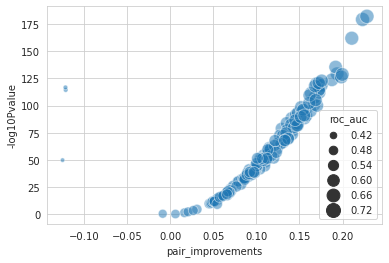

In [33]:
pair_improvements = lr_pair_auc.mean(0) - dummy_pair_auc.mean(0)
metrics_pair_df = pd.DataFrame({'pair_improvements': pair_improvements,
                                '-log10Pvalue': -np.log10(p_pair),
                                'roc_auc': lr_pair_auc.mean(0)})

sns.scatterplot(x='pair_improvements', y='-log10Pvalue', size='roc_auc', sizes=(20, 200), alpha=0.5, data=metrics_pair_df)

In [34]:
pair_features = new_df.columns[20:]

pair_features[np.argsort(p_pair)]

Index(['MaxRemodelingRatio_MaxStenosisByDiameter',
       'MaxRemodelingRatio_MaxStenosisByArea',
       'MaxMaxWallThickness_MaxRemodelingRatio',
       'MaxCALCAreaProp_MaxRemodelingRatio', 'MATXVolProp_MaxMaxWallThickness',
       'MaxMaxWallThickness_MaxStenosisByDiameter',
       'MaxMaxWallThickness_MaxStenosisByArea',
       'MaxMATXAreaProp_MaxMaxWallThickness',
       'MaxWallArea_MaxStenosisByDiameter', 'MaxStenosisByArea_MaxWallArea',
       ...
       'MATXVol_MaxMATXAreaProp', 'CALCVolProp_MaxMATXAreaProp',
       'CALCVol_MaxLRNCAreaProp', 'MaxDilationByArea_MaxMATXAreaProp',
       'LRNCVolProp_MaxLRNCAreaProp', 'MaxLRNCAreaProp_WallVol',
       'LRNCVol_MaxLRNCAreaProp', 'CALCVolProp_MaxLRNCAreaProp',
       'MATXVolProp_MaxMATXAreaProp', 'MATXVol_MaxLRNCAreaProp'],
      dtype='object', length=171)

<AxesSubplot:xlabel='Stroke', ylabel='MaxRemodelingRatio_MaxStenosisByDiameter'>

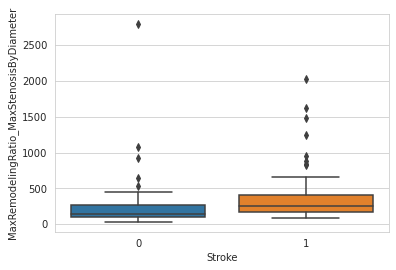

In [36]:
sns.boxplot(x='Stroke', y='MaxRemodelingRatio_MaxStenosisByDiameter', data=new_df)